In [1]:
import glob
import os
from pathlib import Path
from collections import defaultdict

import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter1d

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
def find_csv_files(log_dir, algos, filename) -> list[Path]:
    # Matches …/<SEED>/debug/**/finetuning_eval.csv  (depth under debug doesn't matter)
    
    csv_files = dict()
    for algo, env_name, exp_log_dir in algos:
        pattern = os.path.join(log_dir, "sarsa_ifql_vib_gpi_offline2offline", exp_log_dir, "*", "debug", "**", filename)
        files = [p for p in glob.glob(pattern, recursive=True)]
        if env_name not in csv_files:
            csv_files[env_name] = {algo: files}
        else:
            csv_files[env_name][algo] = files 
    return csv_files


log_dir = "/n/fs/rl-chongyiz/exp_logs/ogbench_logs"
algos = [
    # number of flow goals
    ("N = 1", "cheetah_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_cheetah_walk_obs_norm=normal_alpha=0.3_num_fg=1_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=False_kl_weight=0.05_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 4", "cheetah_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_cheetah_walk_obs_norm=normal_alpha=0.3_num_fg=4_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=False_kl_weight=0.05_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 8", "cheetah_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_cheetah_walk_obs_norm=normal_alpha=0.3_num_fg=8_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=False_kl_weight=0.05_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 16 (Ours)", "cheetah_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_cheetah_walk_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.05_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 32", "cheetah_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_cheetah_walk_obs_norm=normal_alpha=0.3_num_fg=32_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=False_kl_weight=0.05_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    
    ("N = 1", "walker_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_walker_walk_obs_norm=normal_alpha=0.3_num_fg=1_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=64_clip_fg=True_hyperparam_ablation"),
    ("N = 4", "walker_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_walker_walk_obs_norm=normal_alpha=0.3_num_fg=4_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=64_clip_fg=True_hyperparam_ablation"),
    ("N = 8", "walker_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_walker_walk_obs_norm=normal_alpha=0.3_num_fg=8_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=64_clip_fg=True_hyperparam_ablation"),
    ("N = 16 (Ours)", "walker_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_walker_walk_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.1_latent_dim=64_clip_fg=True_hyperparam_ablation"),
    ("N = 32", "walker_walk", "20250725_sarsa_ifql_vib_gpi_offline2offline_walker_walk_obs_norm=normal_alpha=0.3_num_fg=32_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=64_clip_fg=True_hyperparam_ablation"),
    
    ("N = 1", "cube-double-play-singletask-task3-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task3-v0_obs_norm=normal_alpha=30.0_num_fg=1_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 4", "cube-double-play-singletask-task3-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task3-v0_obs_norm=normal_alpha=30.0_num_fg=4_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 8", "cube-double-play-singletask-task3-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task3-v0_obs_norm=normal_alpha=30.0_num_fg=8_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 16 (Ours)", "cube-double-play-singletask-task3-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task3-v0_obs_norm=normal_alpha=30.0_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 32", "cube-double-play-singletask-task3-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task3-v0_obs_norm=normal_alpha=30.0_num_fg=32_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    
    ("N = 1", "puzzle-4x4-play-singletask-task1-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_puzzle-4x4-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=1_actor_freq=4_expectile=0.95_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=128_clip_fg=False_hyperparam_ablation"),
    ("N = 4", "puzzle-4x4-play-singletask-task1-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_puzzle-4x4-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=4_actor_freq=4_expectile=0.95_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=128_clip_fg=False_hyperparam_ablation"),
    ("N = 8", "puzzle-4x4-play-singletask-task1-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_puzzle-4x4-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=8_actor_freq=4_expectile=0.95_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=128_clip_fg=False_hyperparam_ablation"),
    ("N = 16 (Ours)", "puzzle-4x4-play-singletask-task1-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_puzzle-4x4-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.95_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=128_clip_fg=False_hyperparam_ablation"),
    ("N = 32", "puzzle-4x4-play-singletask-task1-v0", "20250725_sarsa_ifql_vib_gpi_offline2offline_puzzle-4x4-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=32_actor_freq=4_expectile=0.95_num_flow_steps=10_value_ln=False_kl_weight=0.1_latent_dim=128_clip_fg=False_hyperparam_ablation"),
    
    ("N = 4", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=4_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 8", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=8_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 16 (Ours)", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 32", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=32_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),

    ("N = 4", "quadruped_jump", "20250529_sarsa_ifql_vib_gpi_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fg=4_actor_freq=4_expectile=0.9_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.005_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 8", "quadruped_jump", "20250529_sarsa_ifql_vib_gpi_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fg=8_actor_freq=4_expectile=0.9_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.005_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 16 (Ours)", "quadruped_jump", "20250529_sarsa_ifql_vib_gpi_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.005_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 32", "quadruped_jump", "20250529_sarsa_ifql_vib_gpi_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fg=32_actor_freq=4_expectile=0.9_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.005_latent_dim=512_clip_fg=True_hyperparam_ablation"),

    ("N = 4", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=4_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("N = 8", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=8_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("N = 16 (Ours)", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("N = 32", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=32_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),

    ("N = 4", "cube-double-play-singletask-task1-v0", "20250531_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task1-v0_obs_norm=normal_alpha=30_num_fg=4_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 8", "cube-double-play-singletask-task1-v0", "20250531_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task1-v0_obs_norm=normal_alpha=30_num_fg=8_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 16 (Ours)", "cube-double-play-singletask-task1-v0", "20250530_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task1-v0_obs_norm=normal_alpha=30_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("N = 32", "cube-double-play-singletask-task1-v0", "20250531_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task1-v0_obs_norm=normal_alpha=30_num_fg=32_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True_hyperparam_ablation"),
]

env_name_maps = {
    'cheetah_run': 'cheetah run',
    'cheetah_walk': 'cheetah walk',
    'quadruped_jump': 'quadruped jump',
    'walker_walk': 'walker walk',
    'walker_flip': 'walker flip',
    'cube-double-play-singletask-task1-v0': 'cube double task 1',
    'cube-double-play-singletask-task3-v0': 'cube double task 3',
    'scene-play-singletask-task1-v0': 'scene task 1',
    'puzzle-4x4-play-singletask-task1-v0': 'puzzle 4x4 task1',
}
algo_name_maps = {
    'sarsa_ifql_vib_gpi_offline2offline': 'InFOM (Ours)',
    'fb_repr_fom_offline2offline': 'FB + FOM',
    'hilp_fom_offline2offline': 'HILP + FOM',
}


csv_files = find_csv_files(log_dir, algos, filename="finetuning_eval.csv")

In [3]:
def load_data(csv_path, stat_name, step_name) -> np.ndarray:
    df = pd.read_csv(csv_path)
    if stat_name not in df.columns:
        raise KeyError(f"{csv_path} doesn't contain {stat_name}")
    x = df[step_name].values
    y = df[stat_name].values
    return dict(x=x, y=y)


algo_data = defaultdict(dict)
for env_name, env_csv_files in csv_files.items():
    for algo, csv_files in env_csv_files.items():
        seed_data = []
        for csv_file in csv_files:
            if 'singletask' in csv_file:
                data = load_data(csv_file, "evaluation/episode.success", "step")
            else:
                data = load_data(csv_file, "evaluation/episode.return", "step")
            if len(seed_data) == 0:
                seed_data.append(data["x"])
            else:
                assert np.all(data["x"] == seed_data[0])
            seed_data.append(data["y"])

        seed_data = np.asarray(seed_data)
        # steps = seed_data[0]
        # data = seed_data[1:]
        
        algo_data[env_name_maps[env_name]][algo] = seed_data
        if len(seed_data) == 1:
            print("Warning: only one random seed!")

In [4]:
print(algo_data['walker flip']['N = 8'][0].shape)
print(algo_data['walker flip']['N = 8'][1:].shape)

print(algo_data['walker flip']['N = 8'][0].shape)
print(algo_data['walker flip']['N = 8'][1:].shape)

print(algo_data['walker flip']['N = 16 (Ours)'][0].shape)
print(algo_data['walker flip']['N = 16 (Ours)'][1:].shape)

print(algo_data['walker flip']['N = 32'][0].shape)
print(algo_data['walker flip']['N = 32'][1:].shape)

(11,)
(4, 11)
(11,)
(4, 11)
(11,)
(4, 11)
(11,)
(3, 11)


In [5]:
for env_name, env_data in algo_data.items():
    for algo, data in env_data.items():
        # x = data[0] - 1e6
        y = data[1:, -3:].mean(axis=-1)
        y_mean = np.mean(y, axis=0)
        # if env_name == 'walker flip':
        #     y_mean = np.mean(y, axis=0) + 50
        # else:
        #     y_mean = np.mean(y, axis=0)
        y_std = np.std(y, axis=0, ddof=1)
        
        print(f"env = {env_name}, {algo}: mean = {y_mean:.4f}, std = {y_std:.4f}")

env = cheetah walk, N = 1: mean = 256.3983, std = 115.6607
env = cheetah walk, N = 4: mean = 283.6660, std = 109.2835
env = cheetah walk, N = 8: mean = 320.3355, std = 112.4321
env = cheetah walk, N = 16 (Ours): mean = 482.8884, std = 114.9119
env = cheetah walk, N = 32: mean = 262.7207, std = 151.0691
env = walker walk, N = 1: mean = 169.2273, std = 73.2659
env = walker walk, N = 4: mean = 335.6028, std = 166.5932
env = walker walk, N = 8: mean = 312.7426, std = 165.7500
env = walker walk, N = 16 (Ours): mean = 500.9728, std = 101.1261
env = walker walk, N = 32: mean = 368.1379, std = 174.6253
env = cube double task 3, N = 1: mean = 0.2350, std = 0.0342
env = cube double task 3, N = 4: mean = 0.1150, std = 0.0928
env = cube double task 3, N = 8: mean = 0.1400, std = 0.0353
env = cube double task 3, N = 16 (Ours): mean = 0.1033, std = 0.0476
env = cube double task 3, N = 32: mean = 0.0783, std = 0.0310
env = puzzle 4x4 task1, N = 1: mean = 0.1000, std = 0.1234
env = puzzle 4x4 task1, N

/tmp/ipykernel_1575902/2830359510.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)


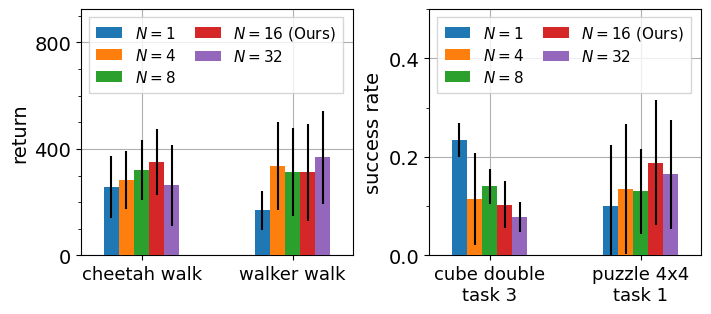

In [ ]:
tasks = ['cheetah walk', 'walker walk', 'cube double\ntask 3', 'puzzle 4x4\ntask 1']

num_flow_goals_1_mean = np.array([256.3983, 169.2273, 0.2350, 0.1000])
num_flow_goals_1_std = np.array([115.6607, 73.2659, 0.0342, 0.1234])
num_flow_goals_4_mean = np.array([283.6660, 335.6028, 0.1150, 0.1350])
num_flow_goals_4_std = np.array([109.2835, 166.5932, 0.0928, 0.1318])
num_flow_goals_8_mean = np.array([320.3355, 312.7426, 0.1400, 0.1300])
num_flow_goals_8_std = np.array([112.4321, 165.7500, 0.0353, 0.0855])
num_flow_goals_16_mean = np.array([351.5321, 312.0009, 0.1033, 0.1883])
num_flow_goals_16_std = np.array([124.3257, 181.5154, 0.0476, 0.1270])
num_flow_goals_32_mean = np.array([262.7207, 368.1379, 0.0783, 0.1650])
num_flow_goals_32_std = np.array([151.0691, 174.6253, 0.0310, 0.1104])

fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
# fig, axes = plt.subplots(1, 1, figsize=(4.2, 3.2))

x = np.arange(2)
width = 0.05

ax = axes[0]
# ax1 = ax.twinx()

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 2 * width, num_flow_goals_1_mean[:2], yerr=num_flow_goals_1_std[:2], width=width, label=r'$N = 1$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 1 * width, num_flow_goals_4_mean[:2], yerr=num_flow_goals_4_std[:2], width=width, label=r'$N = 4$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0 * width, num_flow_goals_8_mean[:2], yerr=num_flow_goals_8_std[:2], width=width, label=r'$N = 8$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1 * width, num_flow_goals_16_mean[:2], yerr=num_flow_goals_16_std[:2], width=width, label=r'$N = 16$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 2 * width, num_flow_goals_32_mean[:2], yerr=num_flow_goals_32_std[:2], width=width, label=r'$N = 32$', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len(tasks[:2]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 925])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.7, ncol=2, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, tasks[:2], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
# ax1.set_ylim([0.0, 1.025])
# ax1.set_yticks([0.0, 0.5, 1.0])
# ax1.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 2 * width, num_flow_goals_1_mean[2:], yerr=num_flow_goals_1_std[2:], width=width, label=r'$N = 1$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 1 * width, num_flow_goals_4_mean[2:], yerr=num_flow_goals_4_std[2:], width=width, label=r'$N = 4$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0 * width, num_flow_goals_8_mean[2:], yerr=num_flow_goals_8_std[2:], width=width, label=r'$N = 8$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1 * width, num_flow_goals_16_mean[2:], yerr=num_flow_goals_16_std[2:], width=width, label=r'$N = 16$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 2 * width, num_flow_goals_32_mean[2:], yerr=num_flow_goals_32_std[2:], width=width, label=r'$N = 32$', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len(tasks[2:]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 0.5])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.7, ncol=2, shadow=False, fancybox=False,)
ax.set_xticks(x * multiplier, tasks[2:], fontsize=13)
ax.set_yticks([0.0, 0.2, 0.4])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/hyperparam_ablation_num_flow_goals.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()

/tmp/ipykernel_1575902/2516580764.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)


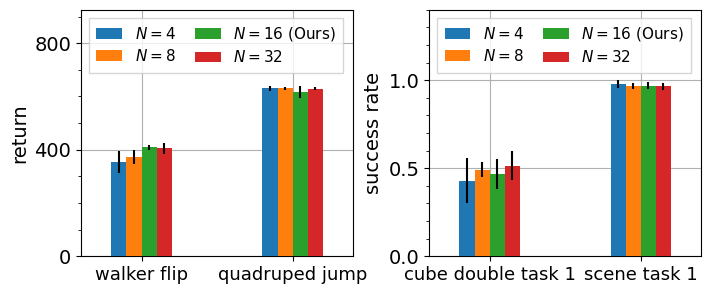

In [32]:
tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']
# tasks = ['walker flip', 'scene task 1']

num_flow_goals_4_mean = np.array([352.7175, 629.8878, 0.4300, 0.9800])
num_flow_goals_4_std = np.array([40.9759, 8.2333, 0.1261, 0.0211])
num_flow_goals_8_mean = np.array([372.2499, 630.1974, 0.4917, 0.9683])
num_flow_goals_8_std = np.array([24.8461, 5.7754, 0.0437, 0.0184])
num_flow_goals_16_mean = np.array([408.8778, 617.6067, 0.4683, 0.9700])
num_flow_goals_16_std = np.array([10.3761, 23.2548, 0.0840, 0.0221])
num_flow_goals_32_mean = np.array([405.1278, 628.6082, 0.5150, 0.9650])
num_flow_goals_32_std = np.array([20.9662, 5.3355, 0.0808, 0.0184])

fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
# fig, axes = plt.subplots(1, 1, figsize=(4.2, 3.2))

x = np.arange(2)
width = 0.05

ax = axes[0]
# ax1 = ax.twinx()

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, num_flow_goals_4_mean[:2], yerr=num_flow_goals_4_std[:2], width=width, label=r'$N = 4$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, num_flow_goals_8_mean[:2], yerr=num_flow_goals_8_std[:2], width=width, label=r'$N = 8$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, num_flow_goals_16_mean[:2], yerr=num_flow_goals_16_std[:2], width=width, label=r'$N = 16$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, num_flow_goals_32_mean[:2], yerr=num_flow_goals_32_std[:2], width=width, label=r'$N = 32$', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len(tasks[:2]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 925])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.7, ncol=2, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, tasks[:2], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
# ax1.set_ylim([0.0, 1.025])
# ax1.set_yticks([0.0, 0.5, 1.0])
# ax1.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, num_flow_goals_4_mean[2:], yerr=num_flow_goals_4_std[2:], width=width, label=r'$N = 4$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, num_flow_goals_8_mean[2:], yerr=num_flow_goals_8_std[2:], width=width, label=r'$N = 8$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, num_flow_goals_16_mean[2:], yerr=num_flow_goals_16_std[2:], width=width, label=r'$N = 16$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, num_flow_goals_32_mean[2:], yerr=num_flow_goals_32_std[2:], width=width, label=r'$N = 32$', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len(tasks[2:]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.4])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.7, ncol=2, shadow=False, fancybox=False,)
ax.set_xticks(x * multiplier, tasks[2:], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/hyperparam_ablation_num_flow_goals.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()